<KeysViewHDF5 ['bin_times', 'images', 'neural', 'regions']>
<KeysViewHDF5 ['standard']>


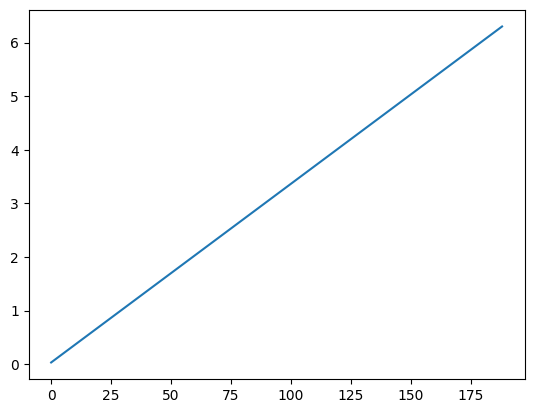

In [24]:
import h5py
import os.path
import numpy as np
import matplotlib.pyplot as plt
import pdb

#exploring example hdf5 file
ex_dir = r"C:\Data\Data\Raw_data\BehaveNet_examples\base_dir\musall\vistrained\mSM36\05-Dec-2017"
ex_dir = os.path.join(ex_dir)

f = h5py.File((ex_dir + '\data.hdf5'), 'r')

#This hdf5 file is a group (behaves like a dictionary)
print(f.keys())

#looking at sub-group bin_times, which is itself another dict
print(f['bin_times'].keys())

#accessing and plotting 1D array of bin times
bin_times = np.asarray(f['bin_times']['standard'])
plt.plot(np.transpose(bin_times))



(189, 2, 128, 128)


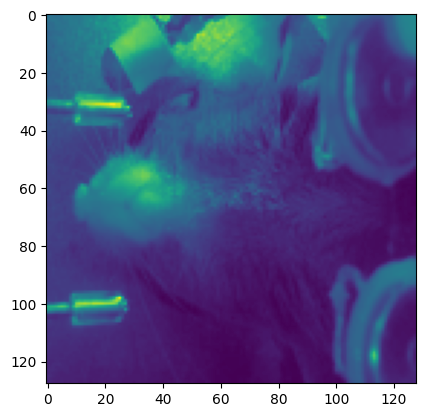

In [4]:
#looking at video data sub-group
tr_list = list(f['images'].keys())
tr1_arr = np.asarray(f['images'][tr_list[0]])
print(np.shape(tr1_arr))
#dims are frame_n, channel_n, x_pix, y_pix
frame1 = np.squeeze(tr1_arr[0, 1, :, :])
plt.imshow(frame1)

(189, 258)


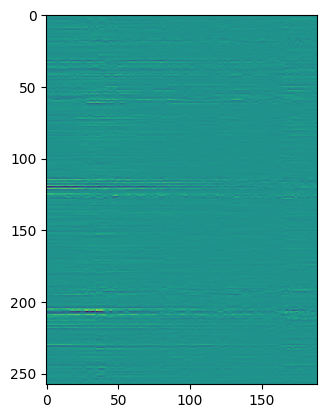

In [12]:
#looking at neural subgroup
tr_list = list(f['neural'].keys())
tr1_arr = np.asarray(f['neural'][tr_list[0]])
print(np.shape(tr1_arr))
#dims are frame_n, neuron_n
plt.imshow(np.transpose(tr1_arr))

In [39]:
#looking at regions subgroup
contents = list(f['regions'].keys())
#contents are 'indxs', 'indxs_consolidate', 'indxs_consolidate_lr'
indxs_list = list(f['regions']['indxs'].keys())
region1 = list(f['regions']['indxs'][indxs_list[0]])

print(region1)
print('This looks like a list of cell numbers. Verifying...')

all_cells = []
for region_name in indxs_list:
    curr_cell_list = list(f['regions']['indxs'][region_name][0])
    all_cells.extend(curr_cell_list)
        
print(f"The total number of items is {len(all_cells)} and the number of cells in 'neural' is {np.shape(tr1_arr)[1]}" )
print(f"And the number of unique items is {len(set(all_cells))}")


#looking at the indxs_consolidate sub-subgroup
indxs_c_list = list(f['regions']['indxs_consolidate'].keys())
region1_c = list(f['regions']['indxs_consolidate'][indxs_c_list[0]])
print(f"indxs_consolidate has fewer regions ({len(indxs_c_list)}) than indxs ({len(indxs_list)}).")
all_cells_c = []
for region_name in indxs_c_list:
    curr_cell_list = list(f['regions']['indxs_consolidate'][region_name][0])
    all_cells_c.extend(curr_cell_list)
print(f"The total number of items in indxs_consolidate is also {len(all_cells_c)}." )

print('It looks like regions can be any arbitrary hierarchy of sub-groupings of the cells in neural.')



[array([206, 207, 208, 209, 210, 211, 212, 213], dtype=uint8)]
This looks like a list of cell numbers. Verifying...
The total number of items is 258 and the number of cells in 'neural' is 258
And the number of unique items is 258
indxs_consolidate has fewer regions (12) than indxs (54).
The total number of items in indxs_consolidate is also 258.
It looks like regions can be any arbitrary hierarchy of sub-groupings of the cells in neural.


In [ ]:
#building an hdf5 file with the video from one fly done in .py file
